In [1]:
#pip install TextBlob

In [2]:
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
from sqlalchemy import create_engine
from sqlalchemy.orm import scoped_session, sessionmaker
import psycopg2
import pyodbc


In [3]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [4]:
#Fetch Tweets and Sentiment data - Join from Tweet and Sentiment tables
try:
    df_dbSentimentData = SqlConn.fetchTweetFinance()
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [5]:
df_dbSentimentData

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
0,156927468836630528,tesla,2012-01-11,The exec conf room at Tesla used to be called ...,32.0,315,67,5.646000,3361500
1,157700726515183616,tesla,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51,4.558000,27502000
2,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43,5.320000,23258000
3,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14,5.320000,23258000
4,168022238061268992,tesla,2012-02-10,Tesla Model X video,12.0,16,47,6.220000,9371000
...,...,...,...,...,...,...,...,...,...
1074,1544719143387238400,twitter,2022-07-06,Can you say more about this: “… pressures that...,NaN,39322,4695,38.209999,4870300
1075,1544743525585141760,doge,2022-07-06,Supporting Doge wherever possible,NaN,10646,2085,0.068583,398926503
1076,1545051509020192768,tesla,2022-07-07,Maybe Tesla should make a highly configurable ...,NaN,120221,6731,733.630005,27310200
1077,1545166492408328192,tesla,2022-07-07,Super fired up for future product development ...,NaN,137575,8685,733.630005,27310200


In [6]:
# Read the csv files containin the tweets by Eon Musk from 2010 to 2022 for DogeCOin, Tesla, spaceX, twitter.
#df_doge = pd.read_csv('../Data_Resources/scrapped_data/doge_tweets.csv')
#df_spaceX = pd.read_csv('../Data_Resources/scrapped_data/spaceX_tweets.csv')
#df_tesla = pd.read_csv('../Data_Resources/scrapped_data/tesla_tweets.csv')
#df_twitter = pd.read_csv('../Data_Resources/scrapped_data/twitter_tweets.csv')

In [7]:
df_doge = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'doge']
df_tesla = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'tesla']
df_twitter = df_dbSentimentData.loc[df_dbSentimentData.financeType == 'twitter']

In [8]:
df_doge

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
456,1113009339743100928,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362
457,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362
458,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362
620,1254039929333649408,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398
663,1284290215561986048,doge,2020-07-18,"Excuse me, I only sell Doge!",416.0,15930,775,0.003473,204080851
...,...,...,...,...,...,...,...,...,...
1051,1530209049261658112,doge,2022-05-27,"Tesla merch can be bought with Doge, soon Spac...",NaN,203719,19599,0.081335,1310057650
1059,1531696049064116224,doge,2022-05-31,And Palmer always forgets to mention that he n...,NaN,3663,317,0.085865,672444588
1060,1531699416490557440,doge,2022-05-31,You’re humble bro. Billy’s sense of humor &amp...,NaN,12204,1237,0.085865,672444588
1071,1538406040374595584,doge,2022-06-19,I will keep supporting Dogecoin,NaN,396566,37467,0.060396,1166163984


In [9]:
print(f"shape of doge df: " + str(df_doge.shape))
print(f"shape of tesla df: " + str(df_tesla.shape))
print(f"shape of twitter df: " + str(df_twitter.shape))

shape of doge df: (75, 9)
shape of tesla df: (910, 9)
shape of twitter df: (94, 9)


In [10]:
df_doge.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
456,1113009339743100928,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362
457,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362
458,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362
620,1254039929333649408,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398
663,1284290215561986048,doge,2020-07-18,"Excuse me, I only sell Doge!",416.0,15930,775,0.003473,204080851


In [11]:
df_tesla.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
0,156927468836630528,tesla,2012-01-11,The exec conf room at Tesla used to be called ...,32.0,315,67,5.646,3361500
1,157700726515183616,tesla,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51,4.558,27502000
2,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43,5.320,23258000
3,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14,5.320,23258000
4,168022238061268992,tesla,2012-02-10,Tesla Model X video,12.0,16,47,6.220,9371000


In [12]:
df_twitter.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume
115,601669073441697792,twitter,2015-05-22,What are the best riddles you've heard that ar...,638.0,599,208,36.599998,9861800
130,716780425939521536,twitter,2016-04-04,Signing off from impromptu Twitter AMA. Thanks...,241.0,3252,367,17.090000,38258800
141,750354728169644032,twitter,2016-07-05,Exactly! I love Twitter.,13.0,328,41,17.139999,15718000
164,783347230245736448,twitter,2016-10-04,I use twitter for news orgs. My Insta has same...,312.0,5254,1598,23.520000,22230700
165,783842202220802048,twitter,2016-10-06,"Yeah, and several others at various times. My ...",20.0,225,16,19.870001,109388200


# Vader Sentiment Analyzer

In [13]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tamie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
vader = SentimentIntensityAnalyzer()

In [15]:
df_doge_vader = df_doge.copy()
df_tesla_vader = df_tesla.copy()
df_twitter_vader = df_twitter.copy()

In [16]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_doge_vader["compound_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_doge_vader["negative_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_doge_vader["neutral_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_doge_vader["positive_sc"] = df_doge_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_doge_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
456,1113009339743100928,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362,0.8176,0.0,0.414,0.586
457,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362,0.0000,0.0,1.000,0.000
458,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362,0.3400,0.0,0.556,0.444
620,1254039929333649408,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398,0.0000,0.0,1.000,0.000
663,1284290215561986048,doge,2020-07-18,"Excuse me, I only sell Doge!",416.0,15930,775,0.003473,204080851,0.1511,0.0,0.715,0.285


In [17]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_tesla_vader["compound_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_tesla_vader["negative_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_tesla_vader["neutral_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_tesla_vader["positive_sc"] = df_tesla_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_tesla_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
0,156927468836630528,tesla,2012-01-11,The exec conf room at Tesla used to be called ...,32.0,315,67,5.646,3361500,0.6616,0.000,0.826,0.174
1,157700726515183616,tesla,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51,4.558,27502000,0.0000,0.000,1.000,0.000
2,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43,5.320,23258000,-0.0772,0.122,0.732,0.146
3,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14,5.320,23258000,0.0875,0.138,0.665,0.197
4,168022238061268992,tesla,2012-02-10,Tesla Model X video,12.0,16,47,6.220,9371000,0.0000,0.000,1.000,0.000


In [18]:
# df_doge_vader["normalized"] = df_doge_vader["Tweet"].apply(lambda tweet:unicodedata.normalize('NFKD', tweet))
df_twitter_vader["compound_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["compound"])
df_twitter_vader["negative_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neg"])
df_twitter_vader["neutral_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["neu"])
df_twitter_vader["positive_sc"] = df_twitter_vader["fullText"].apply(lambda tweet: vader.polarity_scores(tweet)["pos"])
df_twitter_vader.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,compound_sc,negative_sc,neutral_sc,positive_sc
115,601669073441697792,twitter,2015-05-22,What are the best riddles you've heard that ar...,638.0,599,208,36.599998,9861800,0.6369,0.0,0.741,0.259
130,716780425939521536,twitter,2016-04-04,Signing off from impromptu Twitter AMA. Thanks...,241.0,3252,367,17.090000,38258800,0.4404,0.0,0.854,0.146
141,750354728169644032,twitter,2016-07-05,Exactly! I love Twitter.,13.0,328,41,17.139999,15718000,0.6696,0.0,0.308,0.692
164,783347230245736448,twitter,2016-10-04,I use twitter for news orgs. My Insta has same...,312.0,5254,1598,23.520000,22230700,0.0000,0.0,1.000,0.000
165,783842202220802048,twitter,2016-10-06,"Yeah, and several others at various times. My ...",20.0,225,16,19.870001,109388200,0.2960,0.0,0.891,0.109


### Sentiment Analysis by TextBlob

In [19]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [20]:
#Make a copy of the df_doge df
df_doge_txtblb = df_doge.copy()

# Create 2 new columns
df_doge_txtblb["subjectivity"] = df_doge_txtblb["fullText"].apply(getSubjectivity)
df_doge_txtblb["polarity"] = df_doge_txtblb["fullText"].apply(getPolarity)
df_doge_txtblb['Sentiment'] = df_doge_txtblb['polarity'].apply(getAnalysis)
df_doge_txtblb.head()
df_doge_txtblb.to_csv("filename.csv")

In [21]:
df_doge_txtblb["Sentiment"].value_counts()

Neutral     47
Positive    22
Negative     6
Name: Sentiment, dtype: int64

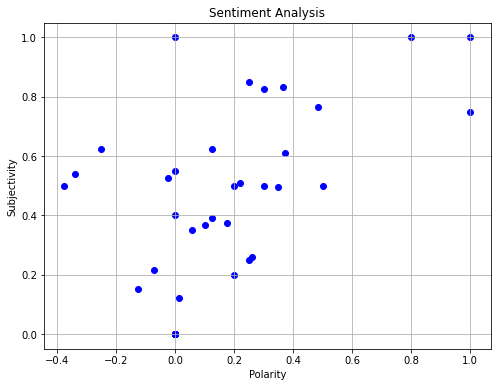

In [22]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_doge_txtblb["polarity"],df_doge_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [23]:
#Make a copy of the df_tesla df
df_tesla_txtblb = df_tesla.copy()

# Create 2 new columns
df_tesla_txtblb["subjectivity"] = df_tesla_txtblb["fullText"].apply(getSubjectivity)
df_tesla_txtblb["polarity"] = df_tesla_txtblb["fullText"].apply(getPolarity)
df_tesla_txtblb['Sentiment'] = df_tesla_txtblb['polarity'].apply(getAnalysis)
df_tesla_txtblb.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,subjectivity,polarity,Sentiment
0,156927468836630528,tesla,2012-01-11,The exec conf room at Tesla used to be called ...,32.0,315,67,5.646,3361500,0.650000,0.350,Positive
1,157700726515183616,tesla,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...",5.0,15,51,4.558,27502000,0.333333,0.250,Positive
2,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,44.0,163,43,5.320,23258000,0.435000,0.150,Positive
3,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,23.0,16,14,5.320,23258000,0.500000,0.175,Positive
4,168022238061268992,tesla,2012-02-10,Tesla Model X video,12.0,16,47,6.220,9371000,0.000000,0.000,Neutral


In [24]:
df_tesla_txtblb["Sentiment"].value_counts()

Positive    527
Neutral     236
Negative    147
Name: Sentiment, dtype: int64

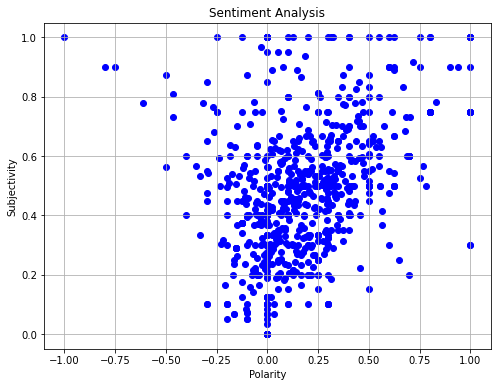

In [25]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_tesla_txtblb["polarity"],df_tesla_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [26]:
#Make a copy of the df_twitter df
df_twitter_txtblb = df_twitter.copy()

# Create 2 new columns
df_twitter_txtblb["subjectivity"] = df_twitter_txtblb["fullText"].apply(getSubjectivity)
df_twitter_txtblb["polarity"] = df_twitter_txtblb["fullText"].apply(getPolarity)
df_twitter_txtblb['Sentiment'] = df_twitter_txtblb['polarity'].apply(getAnalysis)
df_twitter_txtblb.head()

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,subjectivity,polarity,Sentiment
115,601669073441697792,twitter,2015-05-22,What are the best riddles you've heard that ar...,638.0,599,208,36.599998,9861800,0.366667,0.333333,Positive
130,716780425939521536,twitter,2016-04-04,Signing off from impromptu Twitter AMA. Thanks...,241.0,3252,367,17.090000,38258800,0.266667,0.191667,Positive
141,750354728169644032,twitter,2016-07-05,Exactly! I love Twitter.,13.0,328,41,17.139999,15718000,0.600000,0.500000,Positive
164,783347230245736448,twitter,2016-10-04,I use twitter for news orgs. My Insta has same...,312.0,5254,1598,23.520000,22230700,0.125000,0.000000,Neutral
165,783842202220802048,twitter,2016-10-06,"Yeah, and several others at various times. My ...",20.0,225,16,19.870001,109388200,0.262963,-0.051852,Negative


In [27]:
df_twitter_txtblb["Sentiment"].value_counts()

Positive    52
Neutral     30
Negative    12
Name: Sentiment, dtype: int64

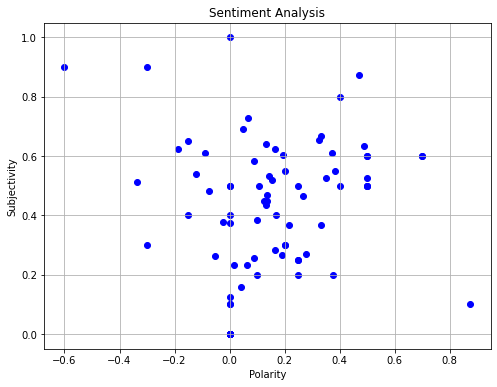

In [28]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df_twitter_txtblb["polarity"],df_twitter_txtblb["subjectivity"], color = 'Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid()
plt.show()

In [29]:
df_dbSentimentData_Combine = pd.concat([df_doge_vader,df_tesla_vader,df_twitter_vader],ignore_index=False)
df_dbSentimentData_Combine.rename(columns = {'Sentiment':'sentiment','compound_sc':'sentimentScore'} ,inplace=True)

In [30]:
df_dbSentimentData_Combine

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,sentimentScore,negative_sc,neutral_sc,positive_sc
456,1113009339743100928,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362,0.8176,0.000,0.414,0.586
457,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362,0.0000,0.000,1.000,0.000
458,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362,0.3400,0.000,0.556,0.444
620,1254039929333649408,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398,0.0000,0.000,1.000,0.000
663,1284290215561986048,doge,2020-07-18,"Excuse me, I only sell Doge!",416.0,15930,775,0.003473,204080851,0.1511,0.000,0.715,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1531632887866576896,twitter,2022-05-31,My kids wrote better code when they were 12 th...,NaN,7563,696,39.599998,11579000,0.9192,0.045,0.695,0.260
1058,1531640532350513152,twitter,2022-05-31,"Maybe if they do the opposite, Twitter will be...",NaN,3306,231,39.599998,11579000,0.4404,0.000,0.828,0.172
1067,1534938078279880704,twitter,2022-06-09,Only Twitter,NaN,57460,2473,39.529999,7970300,0.0000,0.000,1.000,0.000
1072,1539292625433501696,twitter,2022-06-21,Twitter me &amp; real-life me are quite differ...,NaN,147051,8697,38.910000,16902200,0.5530,0.000,0.691,0.309


In [31]:
df_sentiment_tostore = df_dbSentimentData_Combine[["tweetID","date","adjustedClose","volume","sentimentScore"]]

In [32]:
#Insert Sentiment data
try:
    SqlConn.insertSentiment(df_sentiment_tostore)
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [33]:
df_dbSentimentData_Combine

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,adjustedClose,volume,sentimentScore,negative_sc,neutral_sc,positive_sc
456,1113009339743100928,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.002795,60298362,0.8176,0.000,0.414,0.586
457,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.002795,60298362,0.0000,0.000,1.000,0.000
458,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160,1959,0.002795,60298362,0.3400,0.000,0.556,0.444
620,1254039929333649408,doge,2020-04-25,Dogecoin Mode,124.0,2192,207,0.002142,229810398,0.0000,0.000,1.000,0.000
663,1284290215561986048,doge,2020-07-18,"Excuse me, I only sell Doge!",416.0,15930,775,0.003473,204080851,0.1511,0.000,0.715,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1531632887866576896,twitter,2022-05-31,My kids wrote better code when they were 12 th...,NaN,7563,696,39.599998,11579000,0.9192,0.045,0.695,0.260
1058,1531640532350513152,twitter,2022-05-31,"Maybe if they do the opposite, Twitter will be...",NaN,3306,231,39.599998,11579000,0.4404,0.000,0.828,0.172
1067,1534938078279880704,twitter,2022-06-09,Only Twitter,NaN,57460,2473,39.529999,7970300,0.0000,0.000,1.000,0.000
1072,1539292625433501696,twitter,2022-06-21,Twitter me &amp; real-life me are quite differ...,NaN,147051,8697,38.910000,16902200,0.5530,0.000,0.691,0.309
